# Natural Language Processing - Text Summarization example

###### Links: [News Summary Dataset (Kaggle)](https://www.kaggle.com/pariza/bbc-news-summary)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

###### Import data

In [2]:
# Read files txt
import os

folder = "data_summary/full_articles/"
full_articles = []
for file in os.listdir(folder):
    try:
        txt = open(folder+file, "r")
        full_articles.append(' '.join([i.strip() for i in txt.readlines()]))
    except Exception as e:
        print("error file:", file, "-->", e)
    
print("len:", len(full_articles))

error file: .DS_Store --> 'utf-8' codec can't decode byte 0xb0 in position 10: invalid start byte
len: 2214


In [3]:
folder = "data_summary/summaries/"
summaries = []
for file in os.listdir(folder):
    try:
        txt = open(folder+file, "r")
        summaries.append(' '.join([i.strip() for i in txt.readlines()]))
    except Exception as e:
        print("error file:", file, "-->", e)
        
print("len:", len(summaries))

error file: .DS_Store --> 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte
len: 2214


In [4]:
# Create dataframe
dtf = pd.DataFrame({"text":full_articles, "y":summaries})
dtf.head()

,text,y
0,Wilkinson fit to face Edinburgh England capta...,England captain Jonny Wilkinson will make his ...
1,More reforms ahead says Milburn Labour will c...,Labour will continue to pursue controversial r...
2,Ban on hunting comes into force Fox hunting w...,"We will keep these hounds going, we will keep ..."
3,Davenport hits out at Wimbledon World number ...,Reacting to a disputed comment by All England ...
4,Apple iPod family expands market Apple has ex...,The IFPI industry body said that the popularit...


In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214 entries, 0 to 2213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2214 non-null   object
 1   y       2214 non-null   object
dtypes: object(2)
memory usage: 34.7+ KB


In [6]:
# check
i = 33
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
Parmalat to return to stockmarket  Parmalat, the Italian dairy company which went bust after an accounting scandal, hopes to be back on the Italian stock exchange in July.  The firm gained protection from creditors in 2003 after revealing debts of 14bn euros ($18.34bn; £9.6bn). This was eight times higher than it had previously stated. In a statement issued on Wednesday night, Parmalat Finanziaria detailed administrators' latest plans for re-listing the shares of the group.  As part of the re-listing on the Italian stock exchange, creditors' debts are expected to be converted into shares through two new share issues amounting to more than 2bn euros. The company's creditors will be asked to vote on the plan later this year. The plan is likely to give creditors of Parmalat Finanziaria shares worth about 5.7% of the debts they are owed. This is lower than the 11.3% creditors previously hoped to receive. Creditors of Parmalat, the main operating company, are likely to see

### 1 - Text Analysis

- Text cleaning
- Word frequency
- Length analysis

###### Text cleaning

In [7]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["said","mr","would","also"]

In [8]:
dtf = add_preprocessed_text(dtf, column="text", punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
dtf = add_preprocessed_text(dtf, column="y", punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords)
dtf.head()

,text,y,text_clean,y_clean
0,Wilkinson fit to face Edinburgh England capta...,England captain Jonny Wilkinson will make his ...,wilkinson fit face edinburgh england captain j...,england captain jonny wilkinson make longawait...
1,More reforms ahead says Milburn Labour will c...,Labour will continue to pursue controversial r...,reforms ahead says milburn labour continue pur...,labour continue pursue controversial reforms w...
2,Ban on hunting comes into force Fox hunting w...,"We will keep these hounds going, we will keep ...",ban hunting comes force fox hunting dogs illeg...,keep hounds going keep community going end com...
3,Davenport hits out at Wimbledon World number ...,Reacting to a disputed comment by All England ...,davenport hits wimbledon world number one lind...,reacting disputed comment england club chairma...
4,Apple iPod family expands market Apple has ex...,The IFPI industry body said that the popularit...,apple ipod family expands market apple expande...,ifpi industry body popularity portable music p...


In [9]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
parmalat return stockmarket parmalat italian dairy company went bust accounting scandal hopes back italian stock exchange july firm gained protection creditors 2003 revealing debts 14bn euros 1834bn 96bn eight times higher previously stated statement issued wednesday night parmalat finanziaria detailed administrators latest plans relisting shares group part relisting italian stock exchange creditors debts expected converted shares two new share issues amounting 2bn euros companys creditors asked vote plan later year plan likely give creditors parmalat finanziaria shares worth 57 debts owed lower 113 creditors previously hoped receive creditors parmalat main operating company likely see percentage debt receive fall 73 69 several former top parmalat executives investigation fraud scandal lawmakers wednesday night enrico bondi turnaround specialist appointed italian government parmalats chief executive spoke positively company closeddoor hearing chamber deputies industry

###### Word frequency

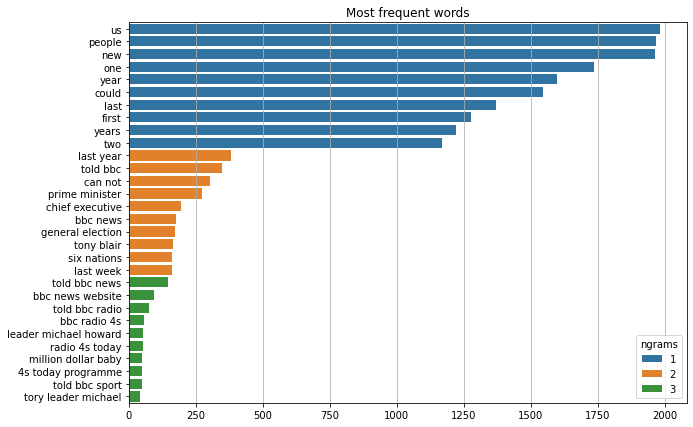

In [10]:
words = word_freq(corpus=dtf["text_clean"], ngrams=[1,2,3], top=10, figsize=(10,7))

###### Length analysis

In [11]:
# Texts
X = add_text_length(dtf, "text_clean")

                            min         mean           max
char_count           290.000000  1331.848238  13963.000000
word_count            48.000000   215.579494   2189.000000
sentence_count         1.000000     1.000000      1.000000
avg_word_length        4.891892     6.166043      7.403509
avg_sentence_lenght   48.000000   215.579494   2189.000000


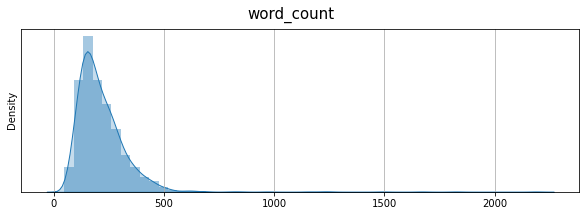

In [12]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [13]:
X_avg_length = int(X["word_count"].mean())

In [14]:
# Summaries
y = add_text_length(dtf, "y_clean")

                       min        mean          max
char_count           121.0  597.155827  6891.000000
word_count            19.0   96.743451  1081.000000
sentence_count         1.0    1.000000     1.000000
avg_word_length        4.8    6.170338     7.736842
avg_sentence_lenght   19.0   96.743451  1081.000000


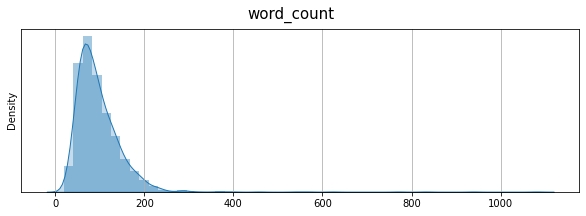

In [15]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [16]:
y_avg_length = int(y["word_count"].mean())

min     0.159341
mean    0.448637
max     0.713178
Name: ratio, dtype: float64


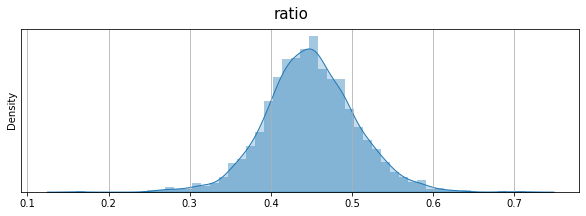

In [17]:
# Ratio summary / text
y["ratio"] = y["word_count"] / X["word_count"]
print(y["ratio"].describe().T[["min","mean","max"]])

plot_distributions(y, x="ratio", figsize=(10,3))

In [18]:
ratio = 0.45

###### Summary

In [19]:
dtf = dtf[["text","text_clean","y_clean"]]
dtf.head()

,text,text_clean,y_clean
0,Wilkinson fit to face Edinburgh England capta...,wilkinson fit face edinburgh england captain j...,england captain jonny wilkinson make longawait...
1,More reforms ahead says Milburn Labour will c...,reforms ahead says milburn labour continue pur...,labour continue pursue controversial reforms w...
2,Ban on hunting comes into force Fox hunting w...,ban hunting comes force fox hunting dogs illeg...,keep hounds going keep community going end com...
3,Davenport hits out at Wimbledon World number ...,davenport hits wimbledon world number one lind...,reacting disputed comment england club chairma...
4,Apple iPod family expands market Apple has ex...,apple ipod family expands market apple expande...,ifpi industry body popularity portable music p...


### 2 - Preprocessing

In [20]:
# Partitioning
dtf_train = dtf.copy().drop([i-1,i,i+1])
dtf_test = dtf.copy().iloc[i-1:i+2]
dtf_test

,text,text_clean,y_clean
32,Turkey-Iran mobile deal 'at risk' Turkey's in...,turkeyiran mobile deal risk turkeys investment...,turkcells mobile deal second turkish investmen...
33,"Parmalat to return to stockmarket Parmalat, t...",parmalat return stockmarket parmalat italian d...,plan likely give creditors parmalat finanziari...
34,Defection timed to hit tax pledge With impecc...,defection timed hit tax pledge impeccable prec...,first time say tax cutsat election people clea...


### 3 - Baseline (Extractive: TextRank)

In [261]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text_clean"], ratio=ratio)

In [262]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

rouge1: 0.55 | rouge2: 0.49 | rougeL: 0.49 --> avg rouge: 0.53


In [263]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [264]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Seq2Seq)

###### Features Engineering

In [21]:
# Add START and END tokens
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

'<START> plan likely give creditors parmalat finanziaria shares worth 57 debts owed creditors parmalat main operating company likely see percentage debt receive fall 73 69 part relisting italian stock exchange creditors debts expected converted shares two new share issues amounting 2bn euros statement issued wednesday night parmalat finanziaria detailed administrators latest plans relisting shares group parmalat italian dairy company went bust accounting scandal hopes back italian stock exchange july <END>'

--- tokenization ---
33887 words
--- padding to sequence ---
2211 sequences of length 215


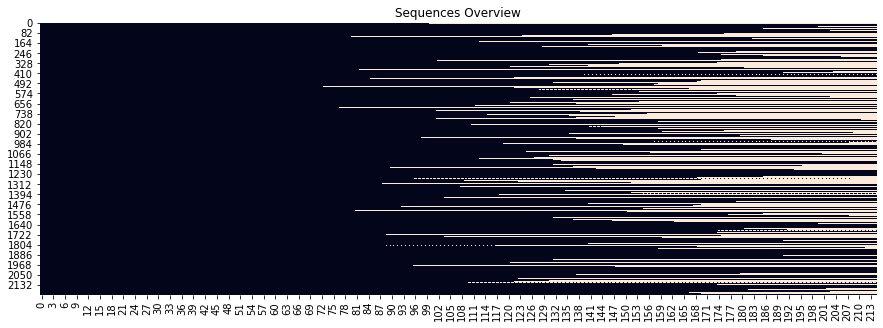

In [22]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], oov="NaN", maxlen=X_avg_length)

X_train, tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

--- tokenization ---
--- padding to sequence ---
3 sequences of length 215


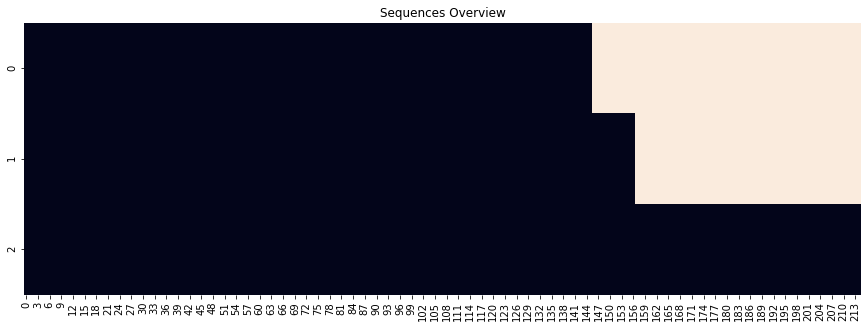

In [23]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=tokenizer, maxlen=X_train.shape[1])

--- tokenization ---
24772 words
--- padding to sequence ---
2211 sequences of length 96


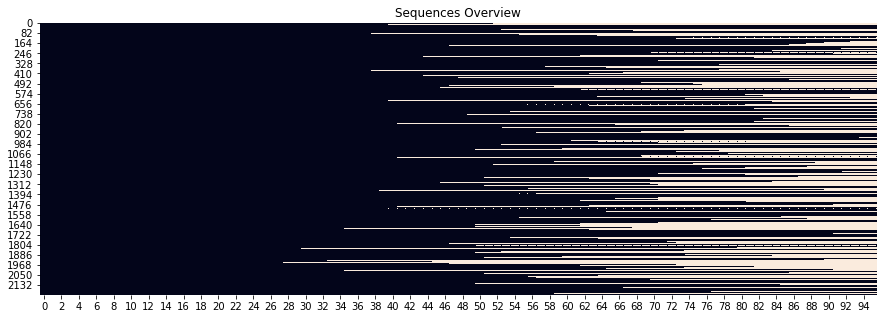

In [24]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], oov="NaN", maxlen=y_avg_length)

y_train, tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

--- tokenization ---
--- padding to sequence ---
3 sequences of length 96


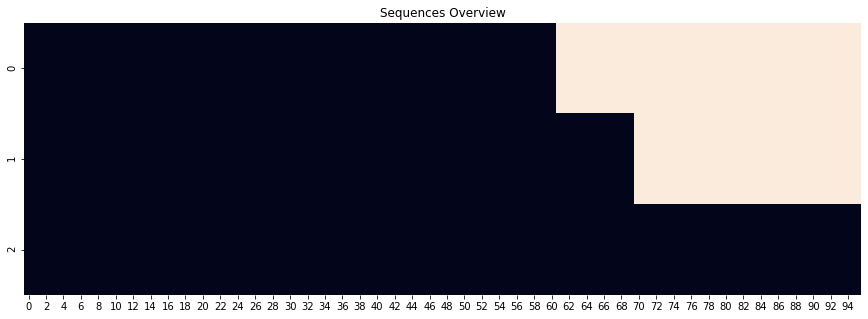

In [25]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=tokenizer, maxlen=y_train.shape[1])

###### Create Embedding Weights

In [26]:
# Load pre-trained W2V
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [27]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

vocabulary mapped to 33888 vectors of size 300


(33888, 300)

In [28]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

vocabulary mapped to 24773 vectors of size 300


(24773, 300)

###### Model Design

In [46]:
# Simple Seq2Seq
lstm_units = 250

##------------ ENCODER (embedding + lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embedding + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

## compile
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 215)]        0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 215, 300)     10166400    x_in[0][0]                       
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    7431900     y_in[0][0]                       
____________________________________________________________________________________________

In [53]:
# Seq2Seq with Embedding + Bi-LSTM + Attention layers
lstm_units = 250

##------------ ENCODER (embedding + 3 lstm) ------------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (embedding + lstm + attention + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, recurrent_dropout=0.2,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### attention
#x, state_x = layers.Attention()([x_out, y_out])
#merge = layers.Concatenate(name='merge', axis=-1)([y_out, y_emb])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

## compile
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 215)]        0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 215, 300)     10166400    x_in[0][0]                       
__________________________________________________________________________________________________
x_lstm_1 (Bidirectional)        [(None, 215, 500), ( 1102000     x_emb[0][0]                      
__________________________________________________________________________________________________
x_lstm_2 (Bidirectional)        [(None, 215, 500), ( 1502000     x_lstm_1[0][0]                   
____________________________________________________________________________________________

###### Train

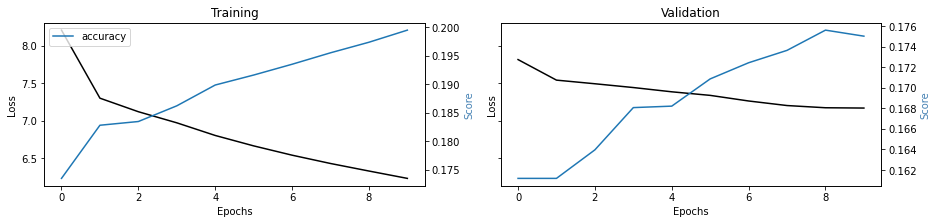

In [47]:
# This takes a while
model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
                    build_encoder_decoder=False, epochs=10, batch_size=64)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=10, batch_size=64)

###### Test

In [48]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

Model: "Prediction_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_in (InputLayer)            [(None, 215)]             0         
_________________________________________________________________
x_emb (Embedding)            (None, 215, 300)          10166400  
_________________________________________________________________
x_lstm (LSTM)                [(None, 215, 250), (None, 551000    
Total params: 10,717,400
Trainable params: 551,000
Non-trainable params: 10,166,400
_________________________________________________________________


In [49]:
# Prediction Decoder
lstm_units = lstm_units*2

## states of the previous time step
encoder_out = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, state_h2, state_c2 = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, encoder_out, state_h, state_c], 
                             outputs=[probs, state_h2, state_c2],
                             name="Prediction_Decoder")
decoder_model.summary()

Model: "Prediction_Decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    7431900     y_in[0][0]                       
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 250)]        0                                            
_________________________________________________________________________________

In [50]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, tokenizer, special_tokens)

In [51]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][33], predicted[1])

rouge1: 0.0 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.0


In [52]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][33], predicted[1], both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [44]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][33], predicted[1], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 5 - Model (Abstractive: Language model)

In [96]:
# Test (no Train)
predicted = bart(corpus=[dtf_test["text"]], ratio=ratio)
predicted = predicted[0]

In [97]:
# Evaluate
evaluate_summary(y_test, predicted)

rouge1: 0.39 | rouge2: 0.15 | rougeL: 0.15 --> avg rouge: 0.31


In [98]:
# Compare y_test and predicted
match = display_string_matching(y_test, predicted, both=True, sentences=True, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [99]:
# Explainability
match = display_string_matching(dtf_test["text_clean"], predicted, both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))